In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
from collections import defaultdict

from utils import plot_model_trajectories
from utils import ENV3

from models.env3 import Random, MostExpensive, LogReg, SVCModel

from tqdm import tqdm_notebook

import config

%matplotlib inline

In [3]:
results = defaultdict(list) # modelname : list  with shape n_runs x n_steps

In [4]:
%%time
ENV_URL = config.ENV3_URL
KEY = config.KEY

env = ENV3(key=KEY, url=ENV_URL)

n_runs = 3
n_steps = 100

models = {
    'Random' : Random(),
    'MostExpensive' : MostExpensive(),
    'LogReg' : LogReg(),
    'LogReg_retrain20' : LogReg(retrain=20),
    'LogReg*price' : LogReg(price_reweight=True),
    'LogReg*price_retrain20' : LogReg(price_reweight=True, retrain=20),
     'SVC' : SVCModel(),
    'SVC_retrain20' : SVCModel(retrain=20),
    'SVC*price' : SVCModel(price_reweight=True),
    'SVC*price_retrain20' : SVCModel(price_reweight=True, retrain=20),
    
}

for model_name, model in models.items():
    
    model_name_entry = model_name + '_' + time.strftime('%H:%M')
    
    for n in tqdm_notebook(range(n_runs), desc=model_name, leave=True, position=0):
        # init model 
        history = env.reset()
        model.train(history)
        input_data = {
            'state' : history['next_state']
        }
        
        rewards = []
        for _ in tqdm_notebook(range(n_steps), desc='run %d' % n, leave=False, position=1):
            time.sleep(0.05)
            
            prediction = model.predict(input_data)
            res = env.predict(prediction) # get res for prediction
            
            input_data = {
                'state' : res['state']
            }
            reward = res['reward']
            rewards.append(reward)
            
        results[model_name_entry].append(rewards)


CPU times: user 23.1 s, sys: 1.53 s, total: 24.6 s
Wall time: 5min 6s


,Model,Score,Conversion Rate
5,LogReg*price_retrain20_17:38,29680,0.316667
9,SVC*price_retrain20_17:40,28804,0.333333
8,SVC*price_17:39,27869,0.343333
4,LogReg*price_17:38,25020,0.360000
1,MostExpensive_17:36,24260,0.253333
6,SVC_17:39,16942,0.336667
0,Random_17:35,16451,0.323333
7,SVC_retrain20_17:39,15863,0.293333
3,LogReg_retrain20_17:37,13817,0.390000
2,LogReg_17:36,12114,0.346667


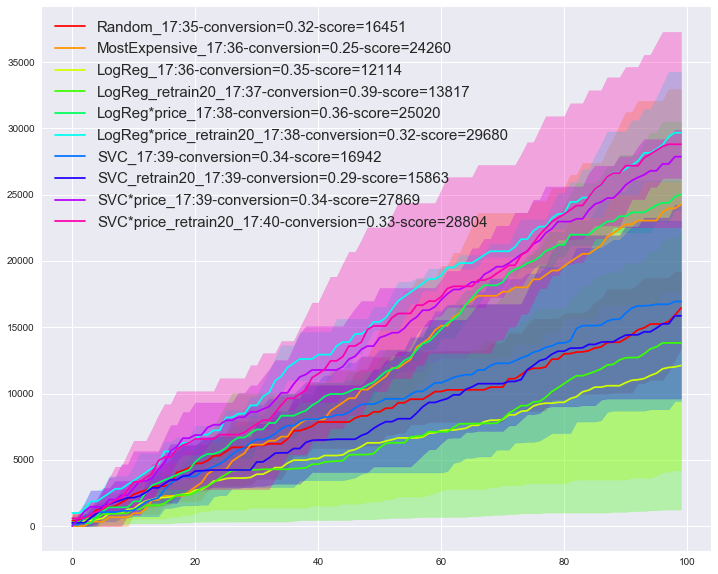

In [5]:
plot_model_trajectories(results)

,Model,Score,Conversion Rate
6,LogReg*price_16:46,35078,0.390000
7,LogReg*price_retrain20_16:48,31072,0.340000
11,SVC*price_retrain20_16:53,28073,0.310000
10,SVC*price_16:53,27402,0.313333
2,MostExpensive_16:21,26687,0.275000
1,MostExpensive_16:20,26093,0.270000
9,SVC_retrain20_16:52,21105,0.386667
5,LogReg_retrain20_16:45,14920,0.430000
3,LogReg_16:44,14735,0.380000
4,LogReg_16:45,14345,0.405000


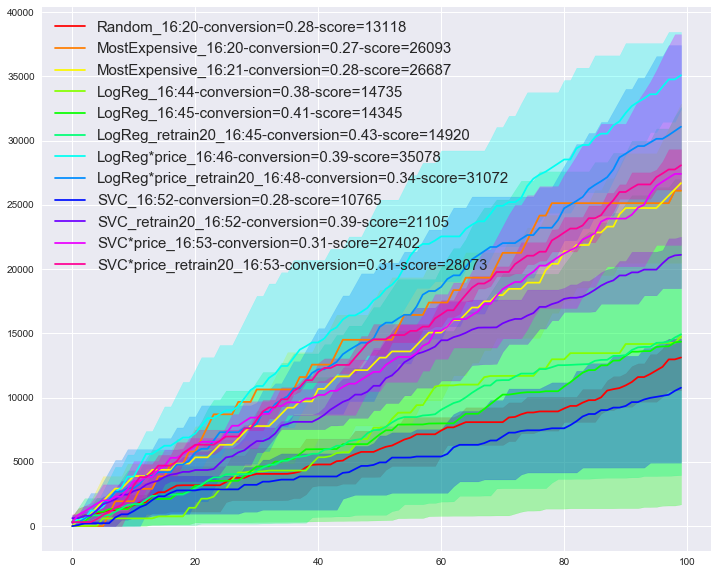

In [27]:
plot_model_trajectories(results)